In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow_datasets as tfds

In [3]:
data,info = tfds.load('oxford_flowers102',split = 'train+test',shuffle_files=True, with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete3WEESL/oxford_flowers102-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete3WEESL/oxford_flowers102-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete3WEESL/oxford_flowers102-validation.tfrecord…

Dataset oxford_flowers102 downloaded and prepared to ~/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


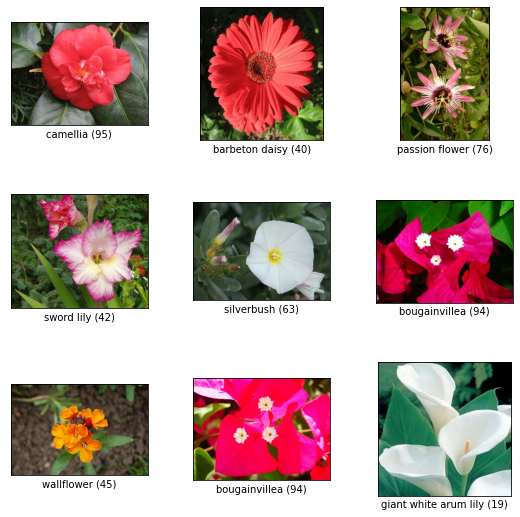

In [4]:
vis = tfds.visualization.show_examples(data,info)

In [5]:
def resize(image,label):
  image = tf.image.resize(image,[224,224])
  return (image,label)

data = data.map(resize)

In [6]:
data = data.map(lambda x,y: (x / 255,y))

In [7]:
data = data.shuffle(len(data))

In [8]:
data = data.batch(32)

In [9]:
def one_hot(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 3)
    # Recasts it to Float32
    label = tf.cast(label, tf.float32)
    return image, label

data = data.map(one_hot)

In [10]:
my_model = tf.keras.models.Sequential(layers = [
                                     tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D((4,4)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Dense(256,activation='relu'),
                                     tf.keras.layers.Dense(3,activation='softmax')
],
name='ConvModel')

# Using the Categorical loss, and ADAM Optimizer
my_model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

Epoch 1/5
225/225 [==============================] - 479s 2s/step - loss: 0.5675 - accuracy: 0.3239
Epoch 2/5
225/225 [==============================] - 472s 2s/step - loss: 5.7901 - accuracy: 0.3398
Epoch 3/5
225/225 [==============================] - 466s 2s/step - loss: 12.3350 - accuracy: 0.3429
Epoch 4/5
225/225 [==============================] - 459s 2s/step - loss: 24.8888 - accuracy: 0.3349
Epoch 5/5
225/225 [==============================] - 464s 2s/step - loss: 32.8389 - accuracy: 0.3360


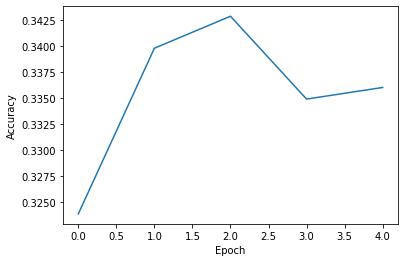

In [12]:
History = my_model.fit(data,epochs=5)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
alpha = plt.plot(History.history['accuracy'])